# Consistency between the C3S Atlas dataset and its origins: Multiple indicators

**Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.**

Production date: 2025-10-01.

Dataset version: 2.0.

Produced by: Olivier Burggraaff, Nicole Reynolds (National Physical Laboratory).

## 🌍 Use case: Retrieving climate indicators from the Copernicus Interactive Climate Atlas

## ❓ Quality assessment question
* **Are the climate indicators in the dataset underpinning the Copernicus Interactive Climate Atlas consistent with their origin datasets?**
* **Can the dataset underpinning the Copernicus Interactive Climate Atlas be reproduced from its origin datasets?**

The [_Copernicus Interactive Climate Atlas_](https://atlas.climate.copernicus.eu/atlas), or _C3S Atlas_ for short, is a C3S web application providing an easy-to-access tool for exploring climate projections, reanalyses, and observational data [[Gutiérrez+24](https://doi.org/10.21957/ah52ufc369)].
Version 2.0 of the application allows the user to interact with 12 datasets:

| Type               | Dataset       |
|--------------------|---------------|
| Climate Projection | CMIP6         |
| Climate Projection | CMIP5         |
| Climate Projection | CORDEX-CORE   |
| Climate Projection | CORDEX-EUR-11 |
| Reanalysis         | ERA5          |
| Reanalysis         | ERA5-Land     |
| Reanalysis         | ORAS5         |
| Reanalysis         | CERRA         |
| Observations       | E-OBS         |
| Observations       | BERKEARTH     |
| Observations       | CPC           |
| Observations       | SST-CCI       |

These datasets are provided through an intermediary dataset, the [_Gridded dataset underpinning the Copernicus Interactive Climate Atlas_](https://doi.org/10.24381/cds.h35hb680) or _C3S Atlas dataset_ for short [[C3S Atlas dataset](https://doi.org/10.24381/cds.h35hb680)].
Compared to their origins, the versions of the climate datasets within the C3S Atlas dataset have been processed following the workflow in Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q02_workflow-fig>`.

```{figure} attachment:c3s_atlas_dataset_workflow.png
---
height: 360px
name: multi-origin-c3s-atlas_consistency_q02_workflow-fig
---
Schematic representation of the workflow for the production of the C3S Atlas dataset from its origin datasets, from the [User-tools for the C3S Atlas](https://ecmwf-projects.github.io/c3s-atlas/chapter01.html).
```

Because a wide range of users interact with climate data through the C3S Atlas application, it is crucial that the underpinning dataset represent its origins correctly.
In other words, the C3S Atlas dataset must be consistent with and reproducible from its origins.
Here, we assess this consistency and reproducibility by comparing climate indicators retrieved from the C3S Atlas dataset with their equivalents calculated from the origin dataset, mirroring the workflow from Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q02_workflow-fig>`.
While a full analysis and reproduction of every record within the C3S Atlas dataset is outside the scope of quality assessment
(and would require high-performance computing infrastructure),
a case study with a narrower scope probes these quality attributes of the dataset
and can be a jumping-off point for further analysis by the reader.

This notebook is part of a series:
| Notebook | Contents |
|---|---|
| [](./derived_multi-origin-c3s-atlas_consistency_q01) | Comparison between C3S Atlas dataset and one origin dataset (CMIP6) for one indicator (`tx35`), including detailed setup. |
| **Consistency between the C3S Atlas dataset and its origins: Multiple indicators** | Comparison between C3S Atlas dataset and one origin dataset (CMIP6) for multiple indicators. |
| [](./derived_multi-origin-c3s-atlas_consistency_q03) | Comparison between C3S Atlas dataset and multiple origin datasets for one indicator. |
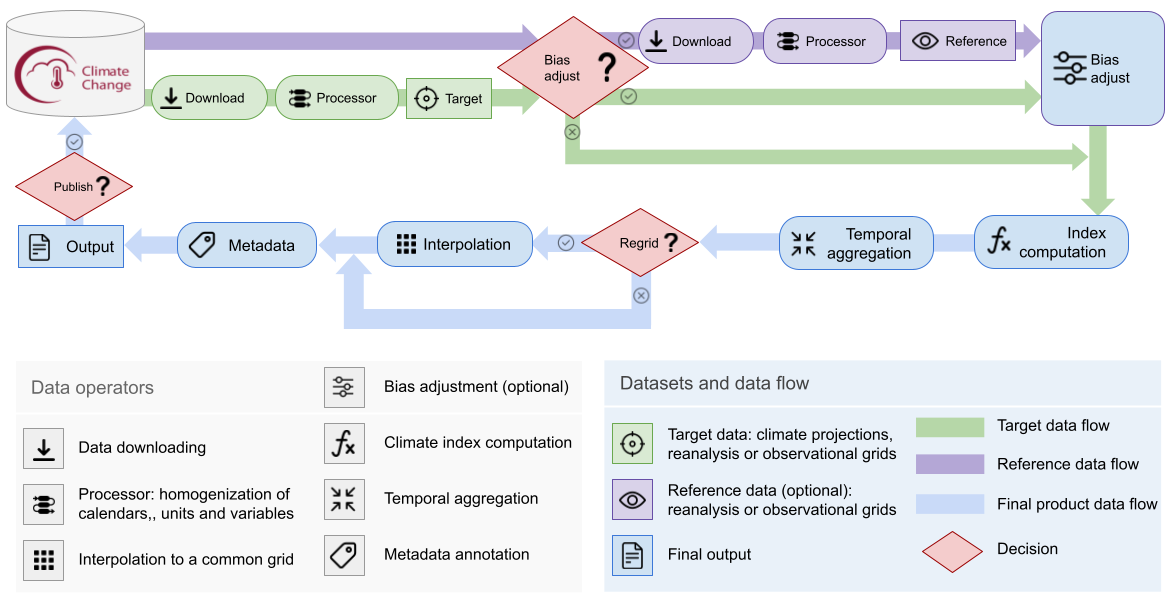

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Values of climate indicators (here 25 monthly indicators) provided by the Gridded dataset underpinning the Copernicus Interactive Climate Atlas are highly consistent with values calculated from its origin datasets (here the CMIP6 multi-model ensemble). The general distribution of indicator values is the same across time and space. However, small differences exist due to the difference in grid, as well as differences in coverage. In isolated cases (e.g. evapotranspiration in the Arctic circle), the C3S Atlas dataset may differ more significantly from its origins. Users of the C3S Atlas dataset – and thus users of the C3S Atlas application – should be aware that values retrieved from C3S Atlas may differ from a manual analysis of the origin dataset.
* The C3S Atlas dataset is highly reproducible from its origins, at least for the CMIP6 dataset. For most indicators, the values provided by the C3S Atlas dataset are identical or very close to those resulting from a manual reprocessing. However, some indicators show larger differences either randomly (e.g. number of days with >1 mm precipitation) or in specific locations (as before). These differences should not affect most users of the C3S Atlas dataset or application in most use cases. For further analysis, it is recommended to manually process the origin dataset.
```

## 📋 Methodology
This quality assessment tests the consistency between climate indicators retrieved from the [_Gridded dataset underpinning the Copernicus Interactive Climate Atlas_](https://doi.org/10.24381/cds.h35hb680) [[C3S Atlas dataset](https://doi.org/10.24381/cds.h35hb680)] and their equivalents calculated from the origin datasets,
as well as the reproducibility of said dataset.

This notebook expands the analysis set out in [the case study](./derived_multi-origin-c3s-atlas_consistency_q01)
to investigate multiple indicators
(listed below, descriptions from the [User-tools for the C3S Atlas](https://ecmwf-projects.github.io/c3s-atlas/chapter01.html))
derived from the CMIP6 multi-model ensemble [[CMIP6 dataset](https://doi.org/10.24381/cds.c866074c)]:

| Indicator | Unit | Full description |
|-----------|------|------------------|
| `t`       | °C   | Monthly mean of daily mean near-surface (2-metre) air temperature |
| `tn`      | °C   | Monthly mean of daily minimum near-surface (2-metre) air temperature |
| `tx`      | °C   | Monthly mean of daily maximum near-surface (2-metre) air temperature |
| `dtr`     | °C   | Monthly mean of near-surface (2-metre) air temperature difference between the maximum and minimum daily temperature |
| `tnn`     | °C   | Monthly minimum of daily minimum near-surface (2-metre) air temperature |
| `txx`     | °C   | Monthly maximum of daily maximum near-surface (2-metre) air temperature |
| `tx35`    | d    | Monthly count of days with maximum near-surface (2-metre) temperature above 35 °C |
| `tx40`    | d    | Monthly count of days with maximum near-surface (2-metre) temperature above 40 °C |
| `tr`      | d    | Monthly count of tropical nights (days with minimum temperature above 20 °C) |
| `fd`      | d    | Monthly count of days with minimum near-surface (2-metre) temperature below 0 °C |
| `r`       | mm   | Monthly mean of daily accumulated precipitation of liquid water equivalent from all phases |
| `sdii`    | mm   | Monthly average of daily precipitation amount of liquid water equivalent from all phases on days with precipitation amount above or equal to 1 mm |
| `prsn`    | mm   | Monthly mean of daily accumulated liquid water equivalent thickness snowfall |
| `rx1day`  | mm   | Monthly maximum of 1-day accumulated precipitation of liquid water equivalent from all phases |
| `r01`     | d    | Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 1 mm |
| `r10`     | d    | Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 10 mm |
| `r20`     | d    | Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 20 mm |
| `pet`     | mm   | Monthly mean daily accumulated potential evapotranspiration (Hargreaves method, 1985), which is the rate at which evapotranspiration would occur under ambient conditions from a uniformly vegetated area when the water supply is not limiting |
| `evspsbl` | mm   | Monthly mean of daily amount of water in the atmosphere due to conversion of both liquid and solid phases to vapor (from underlying surface and vegetation) |
| `huss`    | g/kg | Monthly amount of moisture in the air near the surface divided by amount of air plus moisture at that location |
| `psl`     | hPa  | Monthly average air pressure at mean sea level |
| `sfcwind` | m/s  | Monthly mean of daily mean near-surface (10-metre) wind speed |
| `clt`     | %    | Monthly mean cloud cover area percentage |
| `rsds`    | W/m² | Monthly mean incident solar (shortwave) radiation that reaches a horizontal plane at the surface |
| `rlds`    | W/m² | Monthly mean incident thermal (longwave) radiation at the surface (during cloudless and overcast conditions) |
<!--
| `mrsos`   | kg/m²| Monthly soil shallow moisture content, as the vertical sum per unit area of water in all phases contained in the upper soil portion to a depth of 7 to 10 cm (depending on the dataset) |
| `mrro`    | mm   | Monthly mean of daily amount per unit area of surface and subsurface liquid water which drains from land |
-->
<!--
| `cdd`     | d    | Annual maximum of consecutive days when daily accumulated precipitation amount is below 1 mm |
| `hd`      | °C d | Annual energy consumption to heat the deficit of temperature below 15.5 °C |
| `cd`      | °C d | Annual energy consumption to cool the excess of temperature above 22 °C |
-->
<!--
| `rx5day`  | mm   | Monthly maximum of 5-day accumulated precipitation of liquid water equivalent from all phases |
| `spi6`    | —    | Monthly index that compares accumulated precipitation for 6 months with the long-term precipitation distribution for the same location and accumulation period, as the number of standard deviations from the mean. The reference period corresponds to 1971-2010. |
| `spei6`   | —    | Monthly index that compares accumulated precipitation minus potential evapotranspiration (Hargreaves method, 1985) for 6 months with the long-term distribution for the same location and accumulation period, as the number of standard deviations from the mean. The reference period corresponds to 1971-2010.
-->

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-codesetup)**
 * Install User-tools for the C3S Atlas.
 * Import all required libraries.
 * Definition of helper functions.

**[](section-origin)**
 * Download data from the origin dataset(s).
 * Homogenise data.
 * Calculate indicator(s).
 * Interpolate to a common and regular grid.

**[](section-c3s-atlas)**
 * Download data from the C3S Atlas dataset.

**[](section-results)**
 * Consistency: Compare the C3S Atlas and reproduced datasets on native grids.
 * Reproducibility: Compare the C3S Atlas and reproduced datasets on the C3S Atlas grid.

## 📈 Analysis and results

(section-codesetup)=
### 1. Code setup
```{note}
This notebook uses [earthkit](https://github.com/ecmwf/earthkit) for 
downloading ([earthkit-data](https://github.com/ecmwf/earthkit-data)) 
and visualising ([earthkit-plots](https://github.com/ecmwf/earthkit-plots)) data.
Because earthkit is in active development, some functionality may change after this notebook is published.
If any part of the code stops functioning, please raise an issue on our GitHub repository so it can be fixed.
```

#### Install the User-tools for the C3S Atlas
This notebook uses the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas), which can be installed from GitHub using `pip`.
For convenience, the following cell can do this from within the notebook.
Further details and alternative options for installing this library are available in its [documentation](https://github.com/ecmwf-projects/c3s-atlas?tab=readme-ov-file#requirements).

In [ ]:
!pip install git+https://github.com/ecmwf-projects/c3s-atlas.git

#### Import required libraries
In this section, we import all the relevant packages needed for running the notebook.

In [2]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
np.seterr(divide="ignore")  # Ignore divide-by-zero warnings
import pandas as pd
import xarray as xr
from functools import partial
from dask.array.core import PerformanceWarning
warnings.simplefilter(action="ignore", category=PerformanceWarning)

# Data pre-processing
from c3s_atlas.fixers import apply_fixers
import c3s_atlas.interpolation as xesmfCICA

# Climate indicators
import xclim
xclim.set_options(cf_compliance="log")  # Mute warnings
import c3s_atlas.indexes

# Fix for bug affecting sfcWind units
from c3s_atlas.units import VALID_UNITS
VALID_UNITS["sfcWind"] = r"(m s-1|m s\^-1|m/s)"

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

# Type hints
from typing import Iterable, Optional
from earthkit.plots.geo.domains import Domain
AnyDomain = (Domain | str)

#### Define indicators
This section defines functions and variables for calculating and using the climate indicators.
These are split into three cells, corresponding to their input and output data types.

Daily data → Monthly indicators:

In [3]:
# Daily data -> Monthly indicators
# Input: tas
def cal_t(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily mean near-surface (2-metre) air temperature """
    ds_t = ds['tas'].resample(time='MS').mean().to_dataset(name='t')
    return ds_t

# Input: tasmin
def cal_tn(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily minimum near-surface (2-metre) air temperature """
    ds_tn = ds['tasmin'].resample(time='MS').mean().to_dataset(name='tn')
    return ds_tn 

def cal_tnn(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly minimum of daily minimum near-surface (2-metre) air temperature """
    ds_tnn = ds['tasmin'].resample(time='MS').min().to_dataset(name='tnn')
    return ds_tnn

def cal_tr(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of tropical nights (days with minimum temperature above 20 degC) """
    ds_tr = xclim.indicators.atmos.tropical_nights(ds['tasmin'], thresh='20.0 degC', freq='MS', op='>').to_dataset(name='tr')
    return ds_tr

def cal_fd(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of days with minimum near-surface (2-metre) temperature below 0 °C """
    ds_fd = xclim.indicators.atmos.frost_days(ds['tasmin'], thresh='0 degC', freq='MS').to_dataset(name='fd')
    return ds_fd

# Input: tasmax
def cal_tx(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily maximum near-surface (2-metre) air temperature """
    ds_tx = ds['tasmax'].resample(time='MS').mean().to_dataset(name='tx')
    return ds_tx

def cal_txx(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly maximum of daily maximum near-surface (2-metre) air temperature """
    ds_txx = ds['tasmax'].resample(time='MS').max().to_dataset(name='txx')
    return ds_txx

def cal_tx35(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of days with maximum near-surface (2-metre) temperature above 35 °C """
    ds_tx35 = xclim.indices.tx_days_above(ds['tasmax'], thresh='35.0 degC', freq='MS', op='>').to_dataset(name='tx35')
    return ds_tx35

def cal_tx40(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of days with maximum near-surface (2-metre) temperature above 40 °C """
    ds_tx40 = xclim.indices.tx_days_above(ds['tasmax'], thresh='40.0 degC', freq='MS', op='>').to_dataset(name='tx40')
    return ds_tx40

# Input: tasmin + tasmax
def cal_dtr(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of near-surface (2-metre) air temperature difference between the maximum and minimum daily temperature """
    ds_dtr = xclim.indices.daily_temperature_range(ds['tasmin'], ds['tasmax'], freq='MS', op='mean').to_dataset(name='dtr')
    return ds_dtr

# Input: pr
def cal_r(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily accumulated precipitation of liquid water equivalent from all phases """
    ds_r = ds['pr'].resample(time='MS').mean().to_dataset(name='r')
    return ds_r

def cal_r01(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 1 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    per0 = xr.zeros_like(pr_flux).assign_attrs(units='mm/day')
    ds_r01 = xclim.indices.days_over_precip_thresh(pr_flux, per0, thresh='1 mm/day', freq='MS', bootstrap=False, op='>').to_dataset(name='r01')
    return ds_r01

def cal_sdii(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly average of daily precipitation amount of liquid water equivalent from all phases on days with precipitation amount above or equal to 1 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    ds_sdii = xclim.indicators.atmos.daily_pr_intensity(pr_flux, thresh='1 mm/day', freq='MS', op='>=').to_dataset(name='sdii')
    return ds_sdii

def cal_r10(ds: xr.Dataset) -> xr.Dataset:  
    """ Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 10 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    per0 = xr.zeros_like(pr_flux).assign_attrs(units='mm/day')
    ds_r10 = xclim.indices.days_over_precip_thresh(pr_flux, per0, thresh='10 mm/day', freq='MS', bootstrap=False, op='>').to_dataset(name='r10')
    return ds_r10

def cal_r20(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly count of days with daily accumulated precipitation of liquid water equivalent from all phases above 20 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    per0 = xr.zeros_like(pr_flux).assign_attrs(units='mm/day')
    ds_r20 = xclim.indices.days_over_precip_thresh(pr_flux, per0, thresh='20 mm/day', freq='MS', bootstrap=False, op='>').to_dataset(name='r20')
    return ds_r20

def cal_rx1day(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly maximum of 1-day accumulated precipitation of liquid water equivalent from all phases """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    ds_rx1day = xclim.indicators.atmos.max_n_day_precipitation_amount(pr_flux, window=1, freq='MS').to_dataset(name='rx1day')
    return ds_rx1day

# Input: pet
def cal_pet(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean daily accumulated potential evapotranspiration (Hargreaves method, 1985), which is the rate at which evapotranspiration would occur under ambient conditions from a uniformly vegetated area when the water supply is not limiting """
    ds_pet = xclim.indices.potential_evapotranspiration(ds['tasmin'], ds['tasmax'], method='HG85').resample(time='MS').mean().to_dataset(name='pet')
    # Convert to mm (assuming kg water /m² = mm)
    ds_pet["pet"] *= 86400
    ds_pet["pet"] = ds_pet["pet"].assign_attrs({"units": "mm"})
    return ds_pet

# Input: huss
def cal_huss(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly amount of moisture in the air near the surface divided by amount of air plus moisture at that location """
    ds_huss = ds['huss'].resample(time='MS').mean().to_dataset(name='huss')
    # Convert to g/kg
    ds_huss["huss"] *= 1000
    ds_huss["huss"] = ds_huss["huss"].assign_attrs({"units": "gr kg-1"})
    return ds_huss

# Defunct -- problems with units
# def cal_rx5day(ds: xr.Dataset) -> xr.Dataset:
#     """ Monthly maximum of 5-day accumulated precipitation of liquid water equivalent from all phases """
#     pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
#     ds_rx5day = xclim.indicators.atmos.max_n_day_precipitation_amount(pr_flux, window=5, freq='MS').to_dataset(name='rx5day')
#     return ds_rx5day

# def cal_spi6(ds: xr.Dataset) -> xr.Dataset:
#     """ Monthly index that compares accumulated precipitation for 6 months with the long-term precipitation distribution for the same location and accumulation period, as the number of standard deviations from the mean. The reference period corresponds to 1971-2010 """
#     pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
#     ds_spi6 = xclim.indices.standardized_precipitation_index(pr_flux, freq='MS', window=6, dist='gamma', method='ML').to_dataset(name='spi6')
#     return ds_spi6

# def cal_spei6(ds: xr.Dataset) -> xr.Dataset:
#      """ Monthly index that compares accumulated precipitation minus potential evapotranspiration (Hargreaves method, 1985) for 6 months with the long-term distribution for the same location and accumulation period, as the number of standard deviations from the mean. The reference period corresponds to 1971-2010 """
#     pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
#     ds_spei6 = xclim.indices.standardized_precipitation_index(pr_flux, freq='MS', window=6, dist='gamma', method='ML').to_dataset(name='spei6')
#     return ds_spei6

Monthly data → Monthly indicators:

In [4]:
# Monthly data -> Monthly indicators
# Input: evpsbl
def cal_evspsbl(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily amount of water in the atmosphere due to conversion of both liquid and solid phases to vapor (from underlying surface and vegetation) """
    ds_evspsbl = ds['evspsbl'].resample(time='MS').mean().to_dataset(name='evspsbl')
    return ds_evspsbl

# Input: mrsos
def cal_mrsos(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly soil shallow moisture content, as the vertical sum per unit area of water in all phases contained in the upper soil portion to a depth of 7 to 10 cm (depending on the dataset) """
    ds_mrsos = ds['mrsos'].resample(time='MS').mean().to_dataset(name='mrsos')
    return ds_mrsos

# Input: mrro
def cal_mrro(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily amount per unit area of surface and subsurface liquid water which drains from land """
    ds_mrro = ds['mrro'].resample(time='MS').mean().to_dataset(name='mrro')
    return ds_mrro

# Input: prsn
def cal_prsn(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily accumulated liquid water equivalent thickness snowfall """
    ds_prsn = ds['prsn'].resample(time='MS').mean().to_dataset(name='prsn')
    return ds_prsn

# Input: sfcWind
def cal_sfcwind(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean of daily mean near-surface (10-metre) wind speed """
    ds_sfcwind = ds['sfcWind'].resample(time='MS').mean().to_dataset(name='sfcwind')
    return ds_sfcwind

# Input: clt
def cal_clt(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean cloud cover area percentage """
    ds_clt = ds['clt'].resample(time='MS').mean().to_dataset(name='clt')
    return ds_clt

# Input: rsds
def cal_rsds(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean incident solar (shortwave) radiation that reaches a horizontal plane at the surface """
    ds_rsds = ds['rsds'].resample(time='MS').mean().to_dataset(name='rsds')
    return ds_rsds

# Input: rlds
def cal_rlds(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly mean incident thermal (longwave) radiation at the surface (during cloudless and overcast conditions) """
    ds_rlds = ds['rlds'].resample(time='MS').mean().to_dataset(name='rlds')
    return ds_rlds

# Input: psl
def cal_psl(ds: xr.Dataset) -> xr.Dataset:
    """ Monthly average air pressure at mean sea level """
    ds_psl = ds['psl'].resample(time='MS').mean().to_dataset(name='psl')
    # Convert to hPa
    ds_psl["psl"] /= 100
    ds_psl["psl"] = ds_psl["psl"].assign_attrs({"units": "hPa"})
    return ds_psl

Monthly data → Yearly indicators.
These yearly indicators are not used in the rest of the analysis, but are included as a jumping-off point for the reader's own analysis.

In [5]:
# Daily data -> Yearly indicators
# Input: pr
def cal_cdd(ds: xr.Dataset) -> xr.Dataset:
    """ Annual maximum of consecutive days when daily accumulated precipitation amount is below 1 mm """
    pr_flux = ds['pr'].copy().assign_attrs(units = 'mm/day')
    ds_cdd = xclim.indicators.atmos.maximum_consecutive_dry_days(pr_flux, thresh='1 mm/day', freq='YS', resample_before_rl=True).to_dataset(name='cdd')
    return ds_cdd

# Input: tas + tasmin + tasmax
def cal_hd(ds: xr.Dataset) -> xr.Dataset:
    """ Annual energy consumption to heat the deficit of temperature below 15.5 °C """
    ds_hd = c3s_atlas.indexes.heating_degree_days(ds['tas'], ds['tasmax'], ds['tasmin'], freq='YS', thresh=15.5).to_dataset(name='hd')
    return ds_hd

def cal_cd(ds: xr.Dataset) -> xr.Dataset:
    """ Annual energy consumption to cool the excess of temperature above 22 °C """
    ds_cd = c3s_atlas.indexes.cooling_degree_days(ds['tas'], ds['tasmax'], ds['tasmin'], freq='YS', thresh=22).to_dataset(name='cd')
    return ds_cd

The following cell defines some convenience functions for calculating multiple indicators in a loop, grouped according to their input and output data types:

In [6]:
# Combine functions into dictionaries for easy access by name
indicators_daily2monthly = {
    "t": cal_t,
    "tn": cal_tn,
    "tx": cal_tx,
    "dtr": cal_dtr,
    "tnn": cal_tnn,
    "txx": cal_txx,
    "tx35": cal_tx35,
    "tx40": cal_tx40,
    "tr": cal_tr,
    "fd": cal_fd,
    "r": cal_r,
    "sdii": cal_sdii,
    "rx1day": cal_rx1day,
    "r01": cal_r01,
    "r10": cal_r10,
    "r20": cal_r20,
    # Note: Skipping rx5day due to window length error
    # "rx5day": cal_rx5day,
    # Note: Skipping spi6, spei6 due to unit issues
    # "spi6": cal_spi6,
    # "spei6": cal_spei6,
    "pet": cal_pet,
    "huss": cal_huss,
}

indicators_monthly2monthly = {
    "prsn": cal_prsn,
    "evspsbl": cal_evspsbl,
    # Note: Skipping mrsos and mrro due to CMIP6 grid issues
    # "mrsos": cal_mrsos,
    # "mrro": cal_mrro,
    "psl": cal_psl,
    "sfcwind": cal_sfcwind,
    "clt": cal_clt,
    "rsds": cal_rsds,
    "rlds": cal_rlds,
}

indicators_daily2annual = {
    "cdd": cal_cdd,
    "hd": cal_hd,
    "cd": cal_cd,
}

# Easier access in loops
indicators_monthly = indicators_daily2monthly | indicators_monthly2monthly
indicators_annual  = indicators_daily2annual
indicators         = indicators_daily2monthly | indicators_monthly2monthly | indicators_daily2annual

# Hard-code monthly indicator names to match table in intro
indicators_monthly_names = [
    "t", "tn", "tx", "dtr", "tnn", "txx", "tx35", "tx40", "tr", "fd",
    "r", "sdii", "prsn", "rx1day", "r01", "r10", "r20",
    # "rx5day",
    # "spi6",
    # "spei6",
    "pet", "evspsbl",
    "huss",
    # "mrsos", "mrro",
    "psl", "sfcwind",
    "clt",
    "rsds", "rlds",
]

# Indicators for which a relative difference can be calculated (e.g. not temperature in °C)
indicators_monthly_relative = [
    "dtr", "tx35", "tx40", "tr", "fd",
    "r", "sdii", "prsn", "rx1day", "r01", "r10", "r20",
    "pet", "evspsbl",
    "huss",
    "psl", "sfcwind",
    "clt",
    "rsds", "rlds",
]

# indicators_monthly_names = list(indicators_monthly.keys())
indicators_annual_names  = list(indicators_annual.keys())


# Calculation of multiple indicators
def calculate_indicators_daily2monthly(ds: xr.Dataset) -> xr.Dataset:
    """ Calculate all daily -> monthly indicators and return consolidated dataset. """
    ds_indicators = xr.merge([func(ds) for name, func in indicators_daily2monthly.items()], compat="no_conflicts")
    return ds_indicators

def calculate_indicators_monthly2monthly(ds: xr.Dataset) -> xr.Dataset:
    """ Calculate all monthly -> monthly indicators and return consolidated dataset. """
    ds_indicators = xr.merge([func(ds) for name, func in indicators_monthly2monthly.items()], compat="no_conflicts")
    return ds_indicators

def calculate_indicators_monthly(ds_daily: xr.Dataset, ds_monthly: xr.Dataset) -> xr.Dataset:
    """ Calculate all daily/monthly -> monthly indicators and return consolidated dataset. """
    with warnings.catch_warnings(action="ignore"):  # Catch repetitive warning from dask
        ds_daily2monthly   = calculate_indicators_daily2monthly(ds_daily)
        ds_monthly2monthly = calculate_indicators_monthly2monthly(ds_monthly)

    ds_indicators = xr.merge([ds_daily2monthly, ds_monthly2monthly], compat="no_conflicts", join="outer")
    return ds_indicators

def calculate_indicators_annual(ds: xr.Dataset) -> xr.Dataset:
    """ Calculate all daily -> annual indicators and return consolidated dataset. """
    with warnings.catch_warnings(action="ignore"):  # Catch repetitive divide-by-zero warning
        ds_indicators = xr.merge([func(ds) for name, func in indicators_daily2annual.items()], compat="no_conflicts")

    return ds_indicators

The following cell defines [earthkit-plots styles](https://earthkit-plots.readthedocs.io/en/latest/_api/plots/styles/index.html) for the indicators.
These styles define the colour maps and colour bar ranges for each quantity.
Earthkit-plots styles are explained further in the [corresponding documentation](https://earthkit-plots.readthedocs.io/en/latest/examples/examples/examples.html#Styles).

In [7]:
# Styles for indicators
n_diff = 5  # Levels in difference charts

_style_monthly_days      = {"vmin": 0,     "vmax": 30,    "extend": "neither"}
_style_monthly_days_diff = {"vmin": -2.5,  "vmax": 2.5,   "extend": "both"}
_style_annual_days       = {"vmin": 0,     "vmax": 366,   "extend": "neither"}
_style_annual_days_diff  = {"vmin": -7,    "vmax": 7,     "extend": "both"}
_style_degreedays        = {"vmin": 0,     "vmax": 20000, "extend": "max"}
_style_degreedays_diff   = {"vmin": -5000, "vmax": 5000,  "extend": "both"}

# Temperature
_style_t        = {"cmap": plt.cm.YlOrBr.resampled(10),   "vmin": -5, "vmax": 45, "extend": "both"}
_style_t_diff   = {"cmap": plt.cm.RdBu.resampled(n_diff), "vmin": -2, "vmax": 2,  "extend": "both"}
_style_dtr      = _style_t | {"vmin": 0, "vmax": 20}
_style_dtr_diff = _style_t_diff

# Temperature day indices
_style_tx35      = _style_monthly_days      | {"cmap": plt.cm.Oranges.resampled(10)}
_style_tx35_diff = _style_monthly_days_diff | {"cmap": plt.cm.RdBu_r.resampled(n_diff)}
_style_fd        = _style_monthly_days      | {"cmap": plt.cm.Blues.resampled(10)}
_style_fd_diff   = _style_monthly_days_diff | {"cmap": plt.cm.RdBu.resampled(n_diff)}

# Precipitation
_style_r           = {"cmap": plt.cm.GnBu.resampled(10),     "vmin": 0,  "vmax": 30, "extend": "max"}
_style_r_diff      = {"cmap": plt.cm.BrBG.resampled(n_diff), "vmin": -2, "vmax": 2,  "extend": "both"}
_style_rx1day      = _style_r                 |             {"vmax": 200}
_style_rx1day_diff = _style_r_diff            | {"vmin": -5, "vmax": 5}
_style_r01         = _style_monthly_days      | {"cmap": plt.cm.Blues.resampled(10)}
_style_r01_diff    = _style_monthly_days_diff | {"cmap": plt.cm.RdBu.resampled(n_diff)}
_style_cdd         = _style_annual_days       | {"cmap": plt.cm.Oranges.resampled(10)}

# Evapotranspiration
_style_pet          = {"cmap": plt.cm.GnBu.resampled(8),      "vmin": 0,  "vmax": 8, "extend": "max"}
_style_pet_diff     = {"cmap": plt.cm.BrBG.resampled(n_diff), "vmin": -3, "vmax": 3, "extend": "both"}
_style_evspsbl      = _style_pet      |             {"vmax": 16}
_style_evspsbl_diff = _style_pet_diff | {"vmin": -6, "vmax": 6}

# Humidity
_style_huss      = {"cmap": plt.cm.GnBu.resampled(10),     "vmin": 0,  "vmax": 30, "extend": "max"}
_style_huss_diff = {"cmap": plt.cm.BrBG.resampled(n_diff), "vmin": -5, "vmax": 5,  "extend": "both"}

# Soil moisture
_style_mrsos      = {"cmap": plt.cm.YlGn.resampled(8),      "vmin": 0,  "vmax": 80, "extend": "max"}
_style_mrsos_diff = {"cmap": plt.cm.BrBG.resampled(n_diff), "vmin": -5, "vmax": 5,  "extend": "both"}
_style_mrro       = {"cmap": plt.cm.YlGn.resampled(8),      "vmin": -5, "vmax": 75, "extend": "both"}
_style_mrro_diff  = {"cmap": plt.cm.BrBG.resampled(n_diff), "vmin": -2, "vmax": 2,  "extend": "both"}

# General meteorology
_style_sfcwind      = {"cmap": plt.cm.Purples.resampled(8),   "vmin": 0,    "vmax": 16,   "extend": "max"}
_style_sfcwind_diff = {"cmap": plt.cm.PuOr.resampled(n_diff), "vmin": -1.5, "vmax": 1.5,  "extend": "both"}
_style_clt          = {"cmap": plt.cm.Greys.resampled(10),    "vmin": 0,    "vmax": 100,  "extend": "neither"}
_style_clt_diff     = {"cmap": plt.cm.RdBu.resampled(n_diff), "vmin": -2.5, "vmax": 2.5,  "extend": "both"}
_style_psl          = {"cmap": plt.cm.RdBu_r.resampled(10),   "vmin": 983,  "vmax": 1043, "extend": "neither"}
_style_psl_diff     = {"cmap": plt.cm.RdBu.resampled(n_diff), "vmin": -15,  "vmax": 15,   "extend": "both"}

# Irradiation
_style_rsds      = {"cmap": plt.cm.YlOrRd.resampled(10),   "vmin": 0,  "vmax": 500, "extend": "max"}
_style_rsds_diff = {"cmap": plt.cm.RdBu.resampled(n_diff), "vmin": -5, "vmax": 5,   "extend": "both"}

# Degree days
_style_hd      = _style_degreedays      | {"cmap": plt.cm.Reds.resampled(10)}
_style_hd_diff = _style_degreedays_diff | {"cmap": plt.cm.RdBu.resampled(n_diff)}
_style_cd      = _style_degreedays      | {"cmap": plt.cm.Blues.resampled(10)}
_style_cd_diff = _style_degreedays_diff | {"cmap": plt.cm.RdBu_r.resampled(n_diff)}

# Individual styles
# Set up like this so they can still be edited individually
styles = {
    "t": Style(**_style_t),             "t_diff": Style(**_style_t_diff),
    "tn": Style(**_style_t),            "tn_diff": Style(**_style_t_diff),
    "tx": Style(**_style_t),            "tx_diff": Style(**_style_t_diff),
    "tnn": Style(**_style_t),           "tnn_diff": Style(**_style_t_diff),
    "txx": Style(**_style_t),           "txx_diff": Style(**_style_t_diff),
    "dtr": Style(**_style_dtr),         "dtr_diff": Style(**_style_dtr_diff),
    "tx35": Style(**_style_tx35),       "tx35_diff": Style(**_style_tx35_diff),
    "tx40": Style(**_style_tx35),       "tx40_diff": Style(**_style_tx35_diff),
    "tr": Style(**_style_tx35),         "tr_diff": Style(**_style_tx35_diff),
    "fd": Style(**_style_fd),           "fd_diff": Style(**_style_fd_diff),
    "r": Style(**_style_r),             "r_diff": Style(**_style_r_diff),
    "sdii": Style(**_style_r),          "sdii_diff": Style(**_style_r_diff),
    "prsn": Style(**_style_r),          "prsn_diff": Style(**_style_r_diff),
    "rx1day": Style(**_style_rx1day),   "rx1day_diff": Style(**_style_rx1day_diff),
    "r01": Style(**_style_r01),         "r01_diff": Style(**_style_r01_diff),
    "r10": Style(**_style_r01),         "r10_diff": Style(**_style_r01_diff),
    "r20": Style(**_style_r01),         "r20_diff": Style(**_style_r01_diff),
    "cdd": Style(**_style_cdd),         "cdd_diff": Style(**_style_r01_diff),
    # "rx5day": Style(),
    # "spi6": Style(),
    # "spei6": Style(),
    "pet": Style(**_style_pet),         "pet_diff": Style(**_style_pet_diff),
    "evspsbl": Style(**_style_evspsbl), "evspsbl_diff": Style(**_style_evspsbl_diff),
    "huss": Style(**_style_huss),       "huss_diff": Style(**_style_huss_diff),
    "mrsos": Style(**_style_mrsos),     "mrsos_diff": Style(**_style_mrsos_diff),
    "mrro": Style(**_style_mrro),       "mrro_diff": Style(**_style_mrro_diff),
    "sfcwind": Style(**_style_sfcwind), "sfcwind_diff": Style(**_style_sfcwind_diff),
    "clt": Style(**_style_clt),         "clt_diff": Style(**_style_clt_diff),
    "psl": Style(**_style_psl),         "psl_diff": Style(**_style_psl_diff),
    "rsds": Style(**_style_rsds),       "rsds_diff": Style(**_style_rsds_diff),
    "rlds": Style(**_style_rsds),       "rlds_diff": Style(**_style_rsds_diff),
    "hd": Style(**_style_hd),           "hd_diff": Style(**_style_hd_diff),
    "cd": Style(**_style_cd),           "cd_diff": Style(**_style_cd_diff),
}

# Apply general settings
for style in styles.values():
    style.normalize = False

#### Helper functions
This section defines some functions and variables used in the following analysis, allowing code cells in later sections to be shorter and ensuring consistency.

##### Data downloading & (pre-)processing

The following functions help with downloading data from datasets with limits, by generating multiple CDS requests with similar parameters:

In [9]:
# Create requests for multiple daily / monthly variables
def create_requests_for_variables(main_request: dict, variables: Iterable[str]) -> list[dict]:
    """ Given a `main_request` (e.g. experiment / model / year / ...), add an entry `variable: var` for every var. """
    requests_for_variables = [{"variable": var} for var in variables]
    requests = [(main_request | req) for req in requests_for_variables]
    return requests

# Drop "bnds" variables which can mess with merge later on
def drop_bnds(data: xr.Dataset) -> xr.Dataset:
    """ Remove any "bnds" variables from a dataset """
    bnds = [var for var in data.data_vars if var.endswith("_bnds")]
    data = data.drop_vars(bnds)
    return data

The following functions aid in sub-selecting data, e.g. selecting one model from the ensemble included in the C3S Atlas dataset or selecting data for a specific time frame:

In [10]:
# C3S Atlas dataset: Individual model selection
def select_model_from_c3s_atlas_dataset(data: xr.Dataset, model: str) -> xr.Dataset:
    """ Select only data for the given model. """
    # Ensure the model ID is provided in the right format
    model_id = model.replace("_", "-")

    # Find the corresponding model ID in the list of models
    # This cannot use .sel because the coordinate is not indexed
    select_member = [str(mem) for mem in data.member_id.values if model_id in mem.lower()][0]

    # Find the corresponding data and return those
    member_ind = np.where(data.member_id == select_member)[0]
    data_member = data.sel(member=member_ind).squeeze("member")

    return data_member

# Select (multiple) years in a dataset
def select_years_in_dataset(data: xr.Dataset, years: list[int]) -> xr.Dataset:
    """ Select only data for the given year(s). """
    years_int = [int(y) for y in years]
    return data.sel(time=data.time.dt.year.isin(years_int))

# Select one month in multiple datasets
def select_month_in_multiple_datasets(*data: xr.Dataset, month: int=8) -> list[xr.Dataset]:
    """ Select only data for the given month, in any year. """
    data_month = [d.groupby("time.month")[month] for d in data]
    return data_month

The following functions help with downloading C3S Atlas data for one specific ensemble member and a subset of the temporal range (e.g. one year):

In [11]:
# C3S Atlas dataset: Download all data, pulling out years and model members of interest
def _download_c3s_atlas_single(request: dict, years: Iterable[int | str], model: str) -> xr.Dataset:
    """ Helper function for download_c3s_atlas_data_oneyear_onemember; download and process a single C3S Atlas request. """
    # Download data
    C3S_ATLAS_ID = "multi-origin-c3s-atlas"
    ds = ekd.from_source("cds", C3S_ATLAS_ID, request)
    data = ds.to_xarray(compat="equals")

    # Drop "bnds" variables which can mess with merge later on
    data = drop_bnds(data)

    # Pick out member
    data = select_model_from_c3s_atlas_dataset(data, model)

    # Pick out years
    data = select_years_in_dataset(data, years)

    return data

def download_c3s_atlas_data_onemember(requests: Iterable[dict], years: Iterable[int | str], model: str) -> xr.Dataset:
    """
    Download data from the C3S Atlas dataset, picking out only the year(s) and model member of interest.
    Works in series rather than in parallel, so much slower than a regular earthkit-data download,
    but prevents memory issues from loading several decades and members at once.
    """
    data_combined = [_download_c3s_atlas_single(req, years, model) for req in requests]
    data_combined = xr.merge(data_combined, compat="equals")
    return data_combined

The following functions handle the homogenisation of origin data to a consistent format using the [User-tools for the C3S Atlas](https://ecmwf-projects.github.io/c3s-atlas/intro.html):

In [13]:
# Homogenisation of origin dataset
def homogenise(ds: xr.Dataset, var_name: str, project_id: str) -> xr.Dataset:
    """ Homogenise a dataset `ds` for one variable `var_name` """
    var_mapping = {
                "dataset_variable": {var_name: "data"},
                "aggregation": {"data": "mean"},
        }
    data = apply_fixers(ds, var_name, project_id, var_mapping)
    return data

def homogenise_multiple_variables(ds: xr.Dataset, variable_names: Iterable[str], project_id: str) -> xr.Dataset:
    """ Apply the homogenise function across multiple variables `variable_names` in a dataset `ds` """ 
    homogenised_data = [homogenise(ds, var_name, project_id) for var_name in variable_names]
    homogenised_dataset = xr.merge(homogenised_data, compat="no_conflicts")
    return homogenised_dataset

The following functions handle regridding and interpolating data based on ESMF as implemented in the [User-tools for the C3S Atlas](https://ecmwf-projects.github.io/c3s-atlas/intro.html).
This step is explained in more detail in the relevant section below.

In [14]:
# Interpolation from native grid to C3S Atlas grid
# Note: this only works for monthly, not annual indicators
def interpolate(ds: xr.Dataset, var_name: str) -> xr.Dataset:
    """ Interpolate a dataset `ds` to the C3S Atlas grid for one variable `var_name` """
    int_attr = {"interpolation_method": "conservative_normed", 
                "lats": np.arange(-89.5, 90.5, 1),
                "lons": np.arange(-179.5, 180.5, 1),
                "var_name": var_name,
    }
    INTER = xesmfCICA.Interpolator(int_attr)
    ds_interp = INTER(ds)
    return ds_interp


def interpolate_multiple_variables(ds: xr.Dataset) -> xr.Dataset:
    """ Apply the interpolate function across all variables in a dataset """ 
    variables = tqdm(ds.data_vars, desc="Interpolating variables", leave=False)

    # Ignore repeated warnings on [-90, 90] bounds
    with warnings.catch_warnings(action="ignore"):
        data_interpolated = [interpolate(ds, var_name) for var_name in variables]

    dataset_interpolated = xr.merge(data_interpolated, compat="no_conflicts")
    return dataset_interpolated

##### Statistics
The following functions calculate the difference (absolute / relative) between datasets, handling metadata etc.:

In [15]:
# Constants
NONZERO_THRESHOLD = 1e-5
NONZERO_THRESHOLD_PCT = 0.1

# Difference between datasets
def difference_between_datasets(data1: xr.Dataset, data2: xr.Dataset, diff_variables: Iterable[str]) -> xr.Dataset:
    """ Calculate the difference between two datasets, preserving CRS and metadata. """
    # Subtract
    data1, data2 = [d.drop_vars(["lat_bnds", "lon_bnds", "time_bnds", "height"], errors="ignore") for d in (data1, data2)]
    difference = xr.ufuncs.subtract(data1, data2)
    return difference

def relative_difference_between_datasets(data1: xr.Dataset, data2: xr.Dataset, reldiff_variables: Iterable[str]) -> xr.Dataset:
    """
    Calculate the relative [%] difference between two datasets, preserving CRS and updating metadata.
    Relative difference is calculated relative to the first dataset.
    Where data1 == 0 and data2 == 0, the relative difference is set to 0 too.
    """
    # Select and calculate
    data1, data2 = [dataset.drop_vars([var for var in dataset.data_vars if var not in [*reldiff_variables, "crs"]]) \
                        for dataset in (data1, data2)]

    relative_difference = (data1 - data2) / data1 * 100.

    # Replace 0/0 with 0
    data1_zero = (data1 <= NONZERO_THRESHOLD)  # Threshold slightly > 0 because of floating-point errors
    relative_difference = relative_difference.where(~data1_zero, 0.)

    # Add name
    relative_difference = relative_difference.assign_attrs({"name": "C3S Atlas – Reproduced [%]"})

    return relative_difference

def fraction_over_threshold(data: pd.DataFrame, threshold: float=NONZERO_THRESHOLD) -> pd.DataFrame:
    """ Calculate the % of non-NaN cells in a dataframe greater than a given threshold. """
    data_over = (data >= threshold)
    frac_over = data_over.sum() / data_over.count() * 100.
    return frac_over

fraction_over_threshold_relative = partial(fraction_over_threshold, threshold=NONZERO_THRESHOLD_PCT)

The following functions calculate and display metrics for the difference between two datasets, e.g. mean and median deviation:

In [16]:
def comparison_statistics(dataset1: xr.Dataset, dataset2: xr.Dataset, indicators: str, *,
                          indicators_relative: Iterable[str]=None) -> pd.DataFrame:
    """
    Given two datasets, calculate a number of statistics for each variable and return the result in a table.
    This version is hardcoded for multiple indicators in one year.
    """
    # If indicators_relative is not specified explicitly, assume it is the same as indicators
    if indicators_relative is None:
        indicators_relative = indicators

    # Calculate differences
    differences     =          difference_between_datasets(dataset1, dataset2, diff_variables=indicators)
    differences_rel = relative_difference_between_datasets(dataset1, dataset2, reldiff_variables=indicators_relative)

    # Convert to pandas
    differences = differences.to_dataframe()[indicators]
    differences_abs = differences.abs()

    differences_rel = differences_rel.to_dataframe()[indicators_relative]
    differences_rel_abs = differences_rel.abs()

    # Calculate aggregate statistics
    md   =               differences.agg(["mean", "median"])  \
                                    .rename({"median": r"Median Δ", "mean": "Mean Δ"})
    mad  =           differences_abs.agg(["median"])  \
                                    .rename({"median": r"Median |Δ|"})
    mapd =       differences_rel_abs.agg(["median"])  \
                                    .rename({"median": r"Median |Δ| [%]"})
    nonzero =        differences_abs.apply(fraction_over_threshold)  \
                                    .rename(r"% where |Δ| ≥ ε")
    nonzeropct = differences_rel_abs.apply(fraction_over_threshold_relative)  \
                                    .rename(rf"% where |Δ| ≥ {NONZERO_THRESHOLD_PCT}%")
    md, mad, mapd = [df.T for df in (md, mad, mapd)]

    # Calculate correlation coefficients
    corrs = {indicator: xr.corr(dataset1[indicator], dataset2[indicator]).values 
             for indicator in indicators}
    corrs = pd.DataFrame.from_dict(corrs, orient="index", columns=["Pearson r"])
    
    # Combine statistics into one dataframe
    stats = pd.concat([md, mad, nonzero, mapd, nonzeropct, corrs], axis=1)

    return stats

def display_difference_stats(dataset1: xr.Dataset, dataset2: xr.Dataset, *args, **kwargs) -> str:
    """ Given two datasets, calculate a number of statistics for each variable and display the result in a table. """
    comparison_stats = comparison_statistics(dataset1, dataset2, *args, **kwargs)
    formatted = comparison_stats.style \
                                .format(precision=5)  \
                                .set_caption("C3S Atlas – Reproduced")
    return formatted

##### Visualisation
The following cells contain functions for plotting results, starting with some base helper functions (e.g. displaying in Jupyter Notebook or Jupyter Book style, adding textboxes with consistent formatting, etc.):

In [17]:
# Visualisation: Helper functions, general
def _glue_or_show(fig: plt.Figure, glue_label: Optional[str]=None) -> None:
    """
    If `glue` is available, glue the figure using the provided label.
    If not, display the figure in the notebook.
    """
    try:
        glue(glue_label, fig, display=False)
    except TypeError:
        plt.show()
    finally:
        plt.close()

def _add_textbox_to_subplots(text: str, *axs: Iterable[plt.Axes | ekp.Subplot], right=False) -> None:
    """ Add a text box to each of the specified subplots. """
    # Get the plt.Axes for each ekp.Subplot
    axs = [subplot.ax if isinstance(subplot, ekp.Subplot) else subplot for subplot in axs]

    # Set up location
    x = 0.95 if right else 0.05
    horizontalalignment = "right" if right else "left"

    # Add the text
    for ax in axs:
        ax.text(x, 0.95, text, transform=ax.transAxes,
        horizontalalignment=horizontalalignment, verticalalignment="top",
        bbox={"facecolor": "white", "edgecolor": "black", "boxstyle": "round",
              "alpha": 1})

def _sharexy(axs: np.ndarray) -> None:
    """ Force all of the axes in axs to share x and y with the first element. """
    main_ax = axs.ravel()[0]
    for ax in axs.ravel():
        ax.sharex(main_ax)
        ax.sharey(main_ax)

def _symmetric_xlim(ax: plt.Axes) -> None:
    """ Adjust the xlims for one Axes to be symmetric, based on existing values. """
    current = ax.get_xlim()
    current = np.abs(current)
    maxlim = np.max(current)
    newlim = (-maxlim, maxlim)

    ax.set_xlim(newlim)

The following functions are also base helper functions, but specific to geospatial plots:

In [18]:
# Visualisation: Helper functions for geospatial plots
def _spatial_plot_append_subplots(fig: ekp.Figure, *data: xr.Dataset, domain: Optional[AnyDomain]=None, **kwargs) -> list[ekp.Subplot]:
    """ Plot any number of datasets into new subplots in an existing earthkit figure. """
    # Create subplots
    subplots = [fig.add_map(domain=domain) for d in data]

    # Plot
    for subplot, d in zip(subplots, data):
        subplot.grid_cells(d, **kwargs)

    return subplots

The following cell contains functions for geospatial comparisons between datasets on their native grids or on a common grid (the latter also showing the per-pixel difference):

In [19]:
# Visualisation: Plot indicators geospatially
def geospatial_comparison_multiple_indicators(data1: xr.Dataset, data2: xr.Dataset, indicators: Iterable[str], month: int, *,
                                              label1: str="C3S Atlas dataset", label2: str="Reproduced from origin",
                                              domain: Optional[AnyDomain]=None,
                                              glue_label: Optional[str]=None) -> ekp.Figure:
    """
    Plot a list of indicators in two datasets.
    Assumes the data are from a single year.
    A specific month has to be specified.
    """
    # Pre-process: Select data in one month
    data1_month, data2_month = select_month_in_multiple_datasets(data1, data2, month=month)

    # Setup indicators
    n_indicators = len(indicators)
    loop_indicators = tqdm(indicators, desc="Plotting indicators", leave=False)

    # Create figure
    fig = ekp.Figure(rows=n_indicators, columns=2, size=(7.5, 3*n_indicators))

    # Plot indicators
    for indicator in loop_indicators:
        # Plot individual datasets
        subplots_data = _spatial_plot_append_subplots(fig, data1_month, data2_month, domain=domain, 
                                                      z=indicator, style=styles[indicator])

        # Decorate: Text + Colour bar
        # _add_textbox_to_subplots(year, *subplots_data)
        subplots_data[-1].legend(label=indicator, location="right")

    # Titles on top
    titles = [label1, label2]
    for title, subplot in zip(titles, fig.subplots):
        subplot.ax.set_title(title)

    # Decorate figure
    fig.land()
    fig.coastlines()
    fig.gridlines(linestyle=plt.rcParams["grid.linestyle"])

    # Show result
    _glue_or_show(fig.fig, glue_label)


# Visualisation: Plot indicators geospatially
def geospatial_comparison_multiple_indicators_with_difference(data1: xr.Dataset, data2: xr.Dataset, indicators: Iterable[str], month: int, *,
                                                              label1: str="C3S Atlas dataset", label2: str="Reproduced from origin",
                                                              domain: Optional[AnyDomain]=None,
                                                              glue_label: Optional[str]=None) -> ekp.Figure:
    """
    Plot a list of indicators in two datasets.
    Assumes the data are from a single year.
    A specific month has to be specified.
    """
    # Pre-process: Select data in one month, calculate difference
    data1_month, data2_month = select_month_in_multiple_datasets(data1, data2, month=month)
    difference = difference_between_datasets(data1_month, data2_month, diff_variables=indicators)

    # Setup indicators
    n_indicators = len(indicators)
    loop_indicators = tqdm(indicators, desc="Plotting indicators", leave=False)

    # Create figure
    fig = ekp.Figure(rows=n_indicators, columns=3, size=(7.5, 2*n_indicators))

    # Plot indicators
    for indicator in loop_indicators:
        # Plot individual datasets
        subplots_data = _spatial_plot_append_subplots(fig, data1_month, data2_month, domain=domain, 
                                                      z=indicator, style=styles[indicator])

        # Plot difference
        subplot_diff = fig.add_map(domain=domain)
        subplot_diff.grid_cells(difference, z=indicator, style=styles[f"{indicator}_diff"])

        # Decorate: Text + Colour bar
        subplots_data[0].legend(label=indicator, location="left")
        subplot_diff.legend(label=f"Δ {indicator}", location="right")

    # Titles on top
    titles = [label1, label2, "Difference"]
    for title, subplot in zip(titles, fig.subplots):
        subplot.ax.set_title(title)

    # Decorate figure
    fig.land()
    fig.coastlines()
    fig.gridlines(linestyle=plt.rcParams["grid.linestyle"])

    # Show result
    _glue_or_show(fig.fig, glue_label)

The following cell contains functions for histogram comparisons between datasets on their native grids or on a common grid (the latter also showing the per-pixel difference):

In [21]:
# Visualisation: Plot data in histograms
def histogram_comparison_by_indicator(data1: xr.Dataset, data2: xr.Dataset, indicators: Iterable[str], *,
                                      label1: str="C3S Atlas dataset", label2: str="Reproduced from origin",
                                      glue_label: Optional[str]=None) -> plt.Figure:
    """
    Create a histogram for each indicator in two datasets.
    Flattens all data in the datasets, including spatial and temporal dimensions.
    """
    # Setup indicators
    n_indicators = len(indicators)
    loop_indicators = tqdm(indicators, desc="Plotting indicators", leave=False)

    # Create figure
    fig, axs = plt.subplots(nrows=n_indicators, ncols=2, sharex="row", sharey="row",
                            figsize=(5, 2*n_indicators), layout="constrained", squeeze=False)

    # Plot histograms of data
    # Loop over rows / indicators
    for ax_row, indicator in zip(axs, loop_indicators):
        # Loop over columns / data
        for ax, data in zip(ax_row, (data1, data2)):
            # Flatten data
            d = data[indicator].values.ravel()

            # Create histogram
            ax.hist(d, bins=31, density=True, log=False, color="black")

            # Labels
            ax.grid(True, axis="both")
            ax.set_xlabel(indicator)

        ax_row[0].set_ylabel("Frequency")

        # Identify panel
        _add_textbox_to_subplots(indicator, *ax_row, right=True)

    # Titles on top
    titles = [label1, label2]
    for title, ax in zip(titles, axs[0]):
        ax.set_title(title)

    # Show result
    _glue_or_show(fig, glue_label)


# Visualisation: Plot data + difference in histograms
def histogram_comparison_by_indicator_with_difference(data1: xr.Dataset, data2: xr.Dataset, indicators: Iterable[str], *,
                                                      indicators_relative: Iterable[str]=None,
                                                      label1: str="C3S Atlas dataset", label2: str="Reproduced from origin",
                                                      glue_label: Optional[str]=None) -> plt.Figure:
    """
    Create a histogram for each indicator in two datasets, including the point-by-point difference.
    Flattens all data in the datasets, including spatial and temporal dimensions.
    """
    # If indicators_relative is not specified explicitly, assume it is the same as indicators
    if indicators_relative is None:
        indicators_relative = indicators

    # Calculate difference
    difference = difference_between_datasets(data1, data2, diff_variables=indicators)
    difference_rel = relative_difference_between_datasets(data1, data2, reldiff_variables=indicators_relative)

    # Setup indicators
    n_indicators = len(indicators)
    loop_indicators = tqdm(indicators, desc="Plotting indicators", leave=False)

    # Create figure
    fig, axs = plt.subplots(nrows=n_indicators, ncols=4,
                            figsize=(11, 2*n_indicators), layout="constrained", squeeze=False)

    # Setup x/y share -- cannot be done in plt.subplots because of difference panel not sharing these
    for ax_row in axs:
        _sharexy(ax_row[:2])

    for ax in axs[:, 1:].ravel():
        ax.tick_params(axis="y", labelleft=False)

    for ax in axs[:, 2:].ravel():
        ax.yaxis.set_label_position("right")
        ax.tick_params(axis="y", labelleft=False, labelright=True)

    # Plot histograms of data
    # Loop over rows / indicators
    for ax_row, indicator in zip(axs, loop_indicators):
        # Loop over columns / data
        for ax, data in zip(ax_row, (data1, data2)):
            # Flatten data
            d = data[indicator].values.ravel()

            # Create histogram
            ax.hist(d, bins=31, density=True, log=False, color="black")

            # Labels
            ax.grid(True, axis="both")
            ax.set_xlabel(indicator)

            # Plot difference
            difference_here = difference[indicator].values.ravel()
            ax_row[2].hist(difference_here, bins=31, density=True, log=True, color="black")

            # Plot relative difference
            try:
                difference_rel_here = difference_rel[indicator].values.ravel()
            except KeyError:  # Remove panel if there are no relative differences, e.g. temperature
                ax_row[3].set_axis_off()
            else:
                ax_row[3].hist(difference_rel_here, bins=31, density=True, log=True, color="black")

        ax_row[0].set_ylabel("Frequency")

        # Identify panel
        _add_textbox_to_subplots(indicator, *ax_row[:2], right=True)
        _add_textbox_to_subplots(f"Δ {indicator}", ax_row[2], right=True)
        if indicator in indicators_relative:
            _add_textbox_to_subplots(f"Δ {indicator} [%]", ax_row[3], right=True)

    for ax in axs[:, 2:].ravel():
        _symmetric_xlim(ax)  # Symmetric xlims for difference
        # Adjust ylim if too close
        ymin, ymax = ax.get_ylim()
        if ymax / ymin < 100:
            ax.set_ylim(ymax/100, ymax)
    for ax in axs[:, 2].ravel():
        ax.set_xlabel("Difference")
    for ax in axs[:, 3].ravel():
        ax.set_xlabel("% Difference")

    # Titles on top
    titles = [label1, label2, "Difference", "% Difference"]
    for title, ax in zip(titles, axs[0]):
        ax.set_title(title)

    # Show result
    _glue_or_show(fig, glue_label)

(section-origin)=
### 2. Calculate indicators from the origin dataset

#### Download data
This notebook uses [earthkit-data](https://github.com/ecmwf/earthkit-data) to download files from the CDS.
If you intend to run this notebook multiple times, it is highly recommended that you [enable caching](https://earthkit-data.readthedocs.io/en/latest/guide/caching.html) to prevent having to download the same files multiple times.
If you prefer not to use earthkit, the following requests can also be used with the [cdsapi module](https://cds.climate.copernicus.eu/how-to-api#linux-use-client-step).
In either case (earthkit-data or cdsapi), it is required to set up a CDS account and API key as explained [on the CDS website](https://cds.climate.copernicus.eu/how-to-api).

The first step is to define the parameters that will be shared between the download of the origin dataset (here CMIP6) and the C3S Atlas dataset (in the [next section](section-c3s-atlas)), namely the experiment and model member.
Next, the request to download the corresponding data from CMIP6 is defined,
in this notebook choosing several daily and monthly variables
defined in the following cell.
To simplify the data processing,
daily and monthly variables are downloaded separately.

In [23]:
ORIGIN_ID = "projections-cmip6"
ORIGIN = "cmip6"  # Used in C3S Atlas download; defined here to improve customisability
EXPERIMENT = "ssp5_8_5"
MODEL = "cmcc_esm2"

YEARS = ["2080"]
MONTHS = [f"{month:02d}" for month in range(1, 13)]
DAYS = [f"{day:02d}" for day in range(1, 32)]

VARIABLES_DAILY   = ["tas", "tasmin", "tasmax", "pr", "huss"]
# VARIABLES_MONTHLY = ["evspsbl", "mrsos", "mrro", "prsn", "sfcWind", "clt", "rsds", "rlds", "psl"]
VARIABLES_MONTHLY = ["evspsbl", "prsn", "sfcWind", "clt", "rsds", "rlds", "psl"]

In [24]:
# Setup: General request
request_origin = {
    "experiment": EXPERIMENT,
    "model": MODEL,
    "year": YEARS,
    "month": MONTHS,
    "format": "netcdf",
}

In [ ]:
# Download CMIP6 daily data
request_cmip6_daily = {
    "temporal_resolution": "daily",
    "day": DAYS,
} | request_origin

requests_cmip6_daily_variables = create_requests_for_variables(request_cmip6_daily, VARIABLES_DAILY)
ds_cmip6_daily = ekd.from_source("cds", ORIGIN_ID, *requests_cmip6_daily_variables)
data_cmip6_daily = ds_cmip6_daily.to_xarray(compat="equals")
data_cmip6_daily = drop_bnds(data_cmip6_daily)

In [26]:
data_cmip6_daily

<xarray.Dataset> Size: 404MB
Dimensions:  (time: 365, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 3kB 2080-01-01 12:00:00 ... 2080-12-31 12:00:00
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 8B 2.0
Data variables:
    tas      (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tasmin   (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tasmax   (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    pr       (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    huss     (time, lat, lon) float32 81MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/25c823a7-e043-463c-a6b7-4a6f067f78a4

In [ ]:
# Download CMIP6 monthly data
request_cmip6_monthly = {
    "temporal_resolution": "monthly",
} | request_origin

requests_cmip6_monthly_variables = create_requests_for_variables(request_cmip6_monthly, VARIABLES_MONTHLY)
ds_cmip6_monthly = ekd.from_source("cds", ORIGIN_ID, *requests_cmip6_monthly_variables)
data_cmip6_monthly = ds_cmip6_monthly.to_xarray(compat="equals")
data_cmip6_monthly = drop_bnds(data_cmip6_monthly)

In [28]:
data_cmip6_monthly

<xarray.Dataset> Size: 19MB
Dimensions:  (time: 12, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 96B 2080-01-16 12:00:00 ... 2080-12-16 12:00:00
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height   float64 8B ...
Data variables:
    evspsbl  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    prsn     (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    sfcWind  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    clt      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    rsds     (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    rlds     (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    psl      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            evspsbl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/11eb4243-d050-40aa-bc3a-34b8c1195cb6

#### Homogenise data
One of the steps in the C3S Atlas dataset production chain is homogenisation, i.e. ensuring consistency between data from different origin datasets.
This homogenisation is implemented in the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas), specifically the `c3s_atlas.fixers.apply_fixers` function.
The following changes are applied:

- The names of the spatial coordinates are standardised to `[lon, lat]`.
- Longitude is converted from `[0...360]` to `[-180...180]` format.
- The time coordinate is standardised to the CF standard calendar.
- Variable units are standardised (e.g. °C for temperature).
- Variables are resampled / aggregated to the required temporal resolution.

The homogenisation is applied in the following code cells, separately for the daily and monthly data.
More details can be found in the [case study for `tx35`](./derived_multi-origin-c3s-atlas_consistency_q01).

In [ ]:
data_cmip6_daily_homogenised = homogenise_multiple_variables(data_cmip6_daily, VARIABLES_DAILY, ORIGIN_ID)

In [ ]:
data_cmip6_monthly_homogenised = homogenise_multiple_variables(data_cmip6_monthly, VARIABLES_MONTHLY, ORIGIN_ID)

#### Calculate indicators
The climate indicators
are calculated using [xclim](https://xclim.readthedocs.io/en/stable/).
The functions defined [above](section-codesetup) perform the calculations.

In [31]:
indicators_cmip6_monthly = calculate_indicators_monthly(data_cmip6_daily_homogenised, data_cmip6_monthly_homogenised)
indicators_cmip6_monthly

# Annual indicators temporarily disabled due to issues with CF metadata
# indicators_cmip6_annual = calculate_indicators_annual(data_cmip6_daily_homogenised)
# indicators_cmip6_annual

<xarray.Dataset> Size: 90MB
Dimensions:  (lat: 192, lon: 288, time: 12)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB -178.8 -177.5 -176.2 -175.0 ... 177.5 178.8 180.0
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 96B 2080-01-01 2080-02-01 ... 2080-12-01
Data variables: (12/25)
    t        (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tn       (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tx       (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    dtr      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    tnn      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    txx      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ...       ...
    evspsbl  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    psl      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    sfcwind  (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    clt      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    rsds     (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    rlds     (time, lat, lon) float32 3MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>

#### Interpolate to a common and regular grid
```{note}
This notebook uses [xESMF](https://github.com/pangeo-data/xESMF) for regridding data.
xESMF is most easily installed using mamba/conda as explained in its documentation.
Users who cannot or do not wish to use mamba/conda can manually compile and install [ESMF](https://earthsystemmodeling.org/docs/release/latest/ESMF_usrdoc/node10.html) on their machines.
In future, this notebook will use [earthkit-regrid](https://github.com/ecmwf/earthkit-regrid) instead, once it reaches suitable maturity.
```

The final step in the processing is regridding and interpolation to a standard grid (Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q01_workflow-fig>`).
This is performed through a custom function in the [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas/tree/main/c3s_atlas),
specifically `c3s_atlas.interpolation`.
This function is based on ESMF, as noted above.

Note that the C3S Atlas workflow calculates indicators first, then regrids.
For operations that involve averaging, like smoothing and regridding, the order of operations can affect the result, especially in areas with steep gradients [[Burggraaff+20](https://doi.org/10.1364/OE.391470)].
Examples of such areas for a temperature index are coastlines and mountain ranges.
In the case of C3S Atlas, this order of operations was a conscious choice to preserve the "raw" signals,
e.g. preventing extreme temperatures from being smoothed out.
However, it can affect the indicator values and therefore must be considered when using the C3S Atlas application or dataset.

Due to the number of variables involved, this section can take several minutes to run.

In [32]:
indicators_cmip6_monthly_interpolated = interpolate_multiple_variables(indicators_cmip6_monthly)
indicators_cmip6_monthly_interpolated

<xarray.Dataset> Size: 106MB
Dimensions:   (lon: 360, lat: 180, time: 12, bnds: 2)
Coordinates:
  * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 96B 2080-01-01 2080-02-01 ... 2080-12-01
Dimensions without coordinates: bnds
Data variables: (12/29)
    t         (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    lon_bnds  (lon, bnds) float64 6kB -180.0 -179.0 -179.0 ... 179.0 179.0 180.0
    lat_bnds  (lat, bnds) float64 3kB -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
    crs       int64 8B 0
    height    float64 8B 2.0
    tn        (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...        ...
    evspsbl   (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    psl       (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    sfcwind   (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    clt       (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    rsds      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    rlds      (time, lat, lon) float32 3MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [33]:
# Annual indicators
# indicators_cmip6_annual_interpolated = interpolate_multiple_variables(indicators_cmip6_annual)
# indicators_cmip6_annual_interpolated

(section-c3s-atlas)= 
### 3. Retrieve indicators from the C3S Atlas dataset
Here, we download the same indicators as above directly from the [Gridded dataset underpinning the Copernicus Interactive Climate Atlas](https://doi.org/10.24381/cds.h35hb680) so the values can be compared.

When downloading the C3S Atlas dataset from the CDS, it is not possible to specify a specific year or model like it is for e.g. CMIP6.
Instead, data are downloaded in blocks of several decades and include all model members.
To prevent memory issues from loading so many data at once,
a custom function is used that downloads the data for each indicator and pulls out only the year and model member of interest.
Because this is done in sequence
(one indicator after another)
rather than in parallel (all at the same time, like a normal earthkit-data download),
this can result in the following cells taking relatively long (>1 hour) to run the first time.
After the first time, caching in earthkit-data will (if enabled) speed this section up significantly.

In [34]:
# Setup: General request
DOMAIN = "global"
BIAS_ADJUSTMENT = "no_bias_adjustment"

request_c3s_atlas = {
    "origin": ORIGIN,
    "experiment": EXPERIMENT,
    "domain": DOMAIN,
    "period": YEARS,  # Automatically expanded, e.g. 2080 becomes 2015-2100 on the CDS
    "bias_adjustment": BIAS_ADJUSTMENT,
}

In [ ]:
# Download C3S Atlas data
# Monthly indicators
requests_c3s_atlas_monthly = create_requests_for_variables(request_c3s_atlas, indicators_monthly_names)
indicators_c3s_atlas_monthly = download_c3s_atlas_data_onemember(requests_c3s_atlas_monthly, YEARS, MODEL)

# Annual indicators
# requests_c3s_atlas_annual = create_requests_for_variables(request_c3s_atlas, indicators_annual_names)
# indicators_c3s_atlas_annual = download_c3s_atlas_data_onemember(requests_c3s_atlas_annual, YEARS, MODEL)

In [36]:
indicators_c3s_atlas_monthly

<xarray.Dataset> Size: 78MB
Dimensions:          (time: 12, lat: 180, lon: 360)
Coordinates: (12/16)
  * lat              (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon              (lon) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * time             (time) datetime64[ns] 96B 2080-01-01 ... 2080-12-01
    member_id        <U23 92B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U9 36B ...
    ...               ...
    threshold20c     float64 8B ...
    threshold0c      float64 8B ...
    threshold1mm     float64 8B 1.0
    threshold10mm    float64 8B ...
    threshold20mm    float64 8B ...
    height10m        float64 8B ...
Data variables: (12/26)
    t                (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    crs              int32 4B -2147483647
    tn               (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    tx               (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    dtr              (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    tnn              (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    ...               ...
    huss             (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    psl              (time, lat, lon) float32 3MB dask.array<chunksize=(12, 23, 52), meta=np.ndarray>
    sfcwind          (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    clt              (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
    rsds             (time, lat, lon) float32 3MB dask.array<chunksize=(12, 23, 45), meta=np.ndarray>
    rlds             (time, lat, lon) float32 3MB dask.array<chunksize=(12, 26, 52), meta=np.ndarray>
Attributes: (12/26)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      Copernicus Interactive Climate Atlas: gridded...
    summary:                    Monthly/annual gridded data from observations...
    institution:                Copernicus Climate Change Service (C3S)
    producers:                  Institute of Physics of Cantabria (IFCA, CSIC...
    license:                    CC-BY 4.0, https://creativecommons.org/licens...
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2024-12-05 15:51:48.916442+01:00
    tracking_id:                89974d82-56b6-4b47-958e-5954716013d3

In [37]:
# indicators_c3s_atlas_annual

(section-results)=
### 4. Results
This section contains the comparison between the indicator values retrieved from the C3S Atlas dataset vs those reproduced from the origin dataset.

The datasets are first compared on their native grids.
This means a point-by-point comparison is not possible
(because the points are not equivalent),
but the distributions can be compared geospatially and overall.
This comparison probes the consistency quality attribute:
Are the climate indicators in the dataset underpinning the Copernicus Interactive Climate Atlas consistent with their origin datasets?

The second comparison uses the regridded version of the indicators derived from the origin dataset.
This makes a point-by-point comparison possible.
This second comparison probes how well the dataset underpinning the Copernicus Interactive Climate Atlas can be reproduced from its origin datasets,
based on the workflow (Figure {numref}`{number} <multi-origin-c3s-atlas_consistency_q02_workflow-fig>`).

#### Consistency: Comparison on native grids

For the geospatial comparison, 
we display the values of the indicators for one month,
across one region and globally.
In the first example, we display the results across
Europe
in
June,
which should provide significant spatial variation.

This region can easily be modified in the following code cell using the [domains provided by earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/examples/guide/05-domains.html).
Some examples are provided in the cell (commented out using `#`).

In [38]:
# Setup: Choose a month to display
month = 6

# Setup: Pick domain using earthkit-plots
domain = "Europe"
# domain = "Mediterranean"

# Other examples -- uncomment where desired
# domain = ekp.geo.domains.union(["Portugal", "Spain"], name="Iberia")
# domain = "Italy"
# domain = "South America"

As in the [case study for `tx35`](./derived_multi-origin-c3s-atlas_consistency_q01),
it is clear from the geospatial comparison
(Figure {numref}`{number} <derived_multi-origin-c3s-atlas_consistency_q02_fig-geo-regional>`)
that the C3S Atlas dataset closely resembles a manual reproduction of its origin datasets.
The general distribution of indicator values is the same for
all indicators.
In a few cases,
such as
`sdii` (northern Africa, north of the Caspian Sea)
and
`pet` (northern Africa, all seas),
the two datasets differ in terms of coverage.

This pattern is also visible in the overall distributions
(Figure {numref}`{number} <derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-native>`),
which are again very similar for almost all indicators.
The distributions only differ clearly for
`sdii`
and
`pet`,
which is explained by the fact that one dataset has data in areas where the other has gaps or masks.

Only for `pet` in
northern Fennoscandia,
within the Arctic circle,
is there a clear significant difference between values in the two datasets.
In this case,
the pattern observed in the reproduced dataset seems to fit in with its surroundings better than
the sudden drop to 0
seen in the C3S Atlas dataset.
The source of this discrepancy is unclear
but may have been a conscious decision.
In any case,
this difference only affects users planning to use C3S Atlas for agricultural studies within the Arctic circle.

The overall conclusion from this comparison is the same as in the [case study for `tx35`](./derived_multi-origin-c3s-atlas_consistency_q01).
The C3S Atlas dataset and its origins are highly consistent,
but small differences exist due to the difference in grid.
Large differences were observed
only
in a small area
for one indicator.
There are also differences in data availability for some indicators,
likely due to masking.
Users of the C3S Atlas dataset
– and thus users of the C3S Atlas application –
should be aware that the indicator values retrieved for a specific location may differ slightly from a manual analysis of the origin dataset.

In [39]:
# Create plot with function defined at the start
geospatial_comparison_multiple_indicators(indicators_c3s_atlas_monthly, indicators_cmip6_monthly, indicators_monthly_names, month, domain=domain,
                                          glue_label="derived_multi-origin-c3s-atlas_consistency_q02_fig-geo-regional")

# Annual indicators
# geospatial_comparison_multiple_indicators(indicators_c3s_atlas_annual, indicators_cmip6_annual, indicators_annual_names, 1, domain=domain)

```{glue:figure} derived_multi-origin-c3s-atlas_consistency_q02_fig-geo-regional
:figwidth: 700px
:name: "derived_multi-origin-c3s-atlas_consistency_q02_fig-geo-regional"

Comparison between C3S Atlas dataset and reproduction for multiple indicators in one month,
across Europe,
on the native grid of each dataset.
```

In [40]:
# Histogram
fig_hist = histogram_comparison_by_indicator(indicators_c3s_atlas_monthly, indicators_cmip6_monthly, indicators_monthly_names,
                                             glue_label="derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-native")

# Annual indicators
# fig_hist = histogram_comparison_by_indicator(indicators_c3s_atlas_annual, indicators_cmip6_annual, indicators_annual_names)

```{glue:figure} derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-native
:figwidth: 700px
:name: "derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-native"

Comparison between overall distributions of indicator values in the C3S Atlas dataset and its reproduction,
across all spatial and temporal dimensions,
on the native grid of each dataset.
```

#### Reproducibility: Comparison on C3S Atlas grid

After regridding/interpolating,
the indicator values reproduced from the origin dataset
can be compared point-by-point to the values retrieved from the C3S Atlas dataset.
We first examine some metrics that describe the difference Δ between corresponding pixels:

In [41]:
display_difference_stats(indicators_c3s_atlas_monthly, indicators_cmip6_monthly_interpolated, indicators_monthly_names,
                         indicators_relative=indicators_monthly_relative)

As in the [case study for `tx35`](./derived_multi-origin-c3s-atlas_consistency_q01),
it is clear that
the C3S Atlas dataset and its manual reproduction
are very similar.
The median difference, median absolute difference, and median absolute percentage difference
are all close to 0 for
almost all indicators.

The percentage of pixels with a non-zero difference
(defined here as |Δ| ≥ ε with ε = 10{sup}`–5` to avoid floating-point errors)
is a less useful metric here since most of the indicators are
real numbers,
rather than integers like `tx35`.
This leaves more room for small differences in the data to appear due to
small changes in the origin dataset and/or the C3S Atlas workflow software,
which for an integer indicator like `tx35` would tend to be rounded off.
For most indicators,
the relative difference between datasets is ≤0.1% for
the vast majority of point-by-point comparisons.

The distributions of indicator values and differences
(Figure {numref}`{number} <derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-c3s-atlas>`)
confirm that the differences between the two datasets tend to be very small,
with distributions centered around 0 and few outliers.

It is not clear why some indicators show larger differences.
For `pet`, it is clear from the geospatial distribution
(Figure {numref}`{number} <derived_multi-origin-c3s-atlas_consistency_q02_fig-geocomp-regional>`)
that the differences are concentrated in a specific region
(northern Fennoscandia),
as discussed before.
However, the same is not true for the daily precipitation indicators
`r01`,
`r10`,
and
`r20`.
These particular indicators show high values and significant spread across Europe in June
(and presumably in other months)
meaning the differences may simply be due to interpolation.
This also explains why there are non-integer differences:
since the C3S Atlas workflow calculates indicators and _then_ interpolates,
the interpolated indicators can have non-integer values.

We can extend the conclusion from the [`tx35` case study](./derived_multi-origin-c3s-atlas_consistency_q01),
namely that the C3S Atlas dataset can be considered practically reproducible.
However,
some of the indicators show non-zero differences,
either
in specific locations
(e.g. `pet`)
or
distributed randomly
(e.g. `r01`).
The causes of these differences are unclear,
but they are small and rare enough to be negligible for most users using the C3S Atlas dataset,
especially since they will typically use it through the application.
For further analysis,
it is generally best to manually process the origin dataset,
if only to remove the amount of steps that may affect the result.

In [42]:
# Histogram
fig_hist = histogram_comparison_by_indicator_with_difference(indicators_c3s_atlas_monthly, indicators_cmip6_monthly_interpolated, indicators_monthly_names,
                                                             indicators_relative=indicators_monthly_relative,
                                                             glue_label="derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-c3s-atlas")

```{glue:figure} derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-c3s-atlas
:figwidth: 700px
:name: "derived_multi-origin-c3s-atlas_consistency_q02_fig-hist-c3s-atlas"

Comparison between overall distributions of indicator values in the C3S Atlas dataset and its reproduction
on the C3S Atlas grid,
across all spatial and temporal dimensions,
including the per-pixel difference.
```

In [43]:
# Create plot with function defined at the start
geospatial_comparison_multiple_indicators_with_difference(indicators_c3s_atlas_monthly, indicators_cmip6_monthly_interpolated, indicators_monthly_names, month, domain=domain,
                                                          glue_label="derived_multi-origin-c3s-atlas_consistency_q02_fig-geocomp-regional")

# Annual indicators
# geospatial_comparison_multiple_indicators_with_difference(indicators_c3s_atlas_annual, indicators_cmip6_annual_interpolated, indicator, 1,
#                                                           domain=domain)

```{glue:figure} derived_multi-origin-c3s-atlas_consistency_q02_fig-geocomp-regional
:figwidth: 700px
:name: "derived_multi-origin-c3s-atlas_consistency_q02_fig-geocomp-regional"

Comparison between C3S Atlas dataset and reproduction for multiple indicators in one month,
across Europe,
on the C3S Atlas dataset grid,
including the per-pixel difference.
```

## ℹ️ If you want to know more

### Key resources
The CDS catalogue entries for the data used were:
* Gridded dataset underpinning the Copernicus Interactive Climate Atlas: [multi-origin-c3s-atlas](https://doi.org/10.24381/cds.h35hb680)
  * [](./derived_multi-origin-c3s-atlas_consistency_q01)
  * **Consistency between the C3S Atlas dataset and its origins: Multiple indicators**
  * [](./derived_multi-origin-c3s-atlas_consistency_q03)
* CMIP6 climate projections: [projections-cmip6](https://doi.org/10.24381/cds.c866074c)
  * [Quality assessments for CMIP6](../Climate_Projections/CMIP6/CMIP6.md)


Code libraries used:
* [earthkit](https://github.com/ecmwf/earthkit)
  * [earthkit-data](https://github.com/ecmwf/earthkit-data)
  * [earthkit-plots](https://github.com/ecmwf/earthkit-plots)
* [User-tools for the C3S Atlas](https://github.com/ecmwf-projects/c3s-atlas)
* [xclim](https://xclim.readthedocs.io/en/stable/) climate indicator tools


More about the Copernicus Interactive Climate Atlas and its IPCC predecessor:
* [Copernicus Interactive Climate Atlas application](https://atlas.climate.copernicus.eu/)
* [Gridded data underpinning the Copernicus Interactive Climate Atlas: Description of the datasets and variables](https://confluence.ecmwf.int/display/CKB/Gridded+data+underpinning+the+Copernicus+Interactive+Climate+Atlas%3A+Description+of+the+datasets+and+variables)
* [The Copernicus Interactive Climate Atlas: a tool to explore regional climate change](https://doi.org/10.21957/ah52ufc369)
* [Copernicus Interactive Climate Atlas: a new tool to visualise climate variability and change](https://www.ecmwf.int/en/newsletter/179/news/copernicus-interactive-climate-atlas-new-tool-visualise-climate-variability)
* [Implementation of FAIR principles in the IPCC: the WGI AR6 Atlas repository](https://doi.org/10.1038/s41597-022-01739-y)
* [Climate Change 2021 – The Physical Science Basis: Atlas](https://doi.org/10.1017/9781009157896.021)

### References
[[Gutiérrez+24](https://doi.org/10.21957/ah52ufc369)] J. M. Gutiérrez et al., ‘The Copernicus Interactive Climate Atlas: a tool to explore regional climate change’, ECMWF Newsletter, vol. 181, pp. 38–45, Oct. 2024, doi: 10.21957/ah52ufc369.

[[C3S Atlas dataset](https://doi.org/10.24381/cds.h35hb680)] Copernicus Climate Change Service, ‘Gridded dataset underpinning the Copernicus Interactive Climate Atlas’. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), Jun. 17, 2024. doi: 10.24381/cds.h35hb680.

[[CMIP6 dataset](https://doi.org/10.24381/cds.c866074c)] Copernicus Climate Change Service, ‘CMIP6 climate projections’. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), Mar. 23, 2021. doi: 10.24381/cds.c866074c.

[[Burggraaff+20](https://doi.org/10.1364/OE.391470)] O. Burggraaff, ‘Biases from incorrect reflectance convolution’, Optics Express, vol. 28, no. 9, pp. 13801–13816, Apr. 2020, doi: 10.1364/OE.391470.